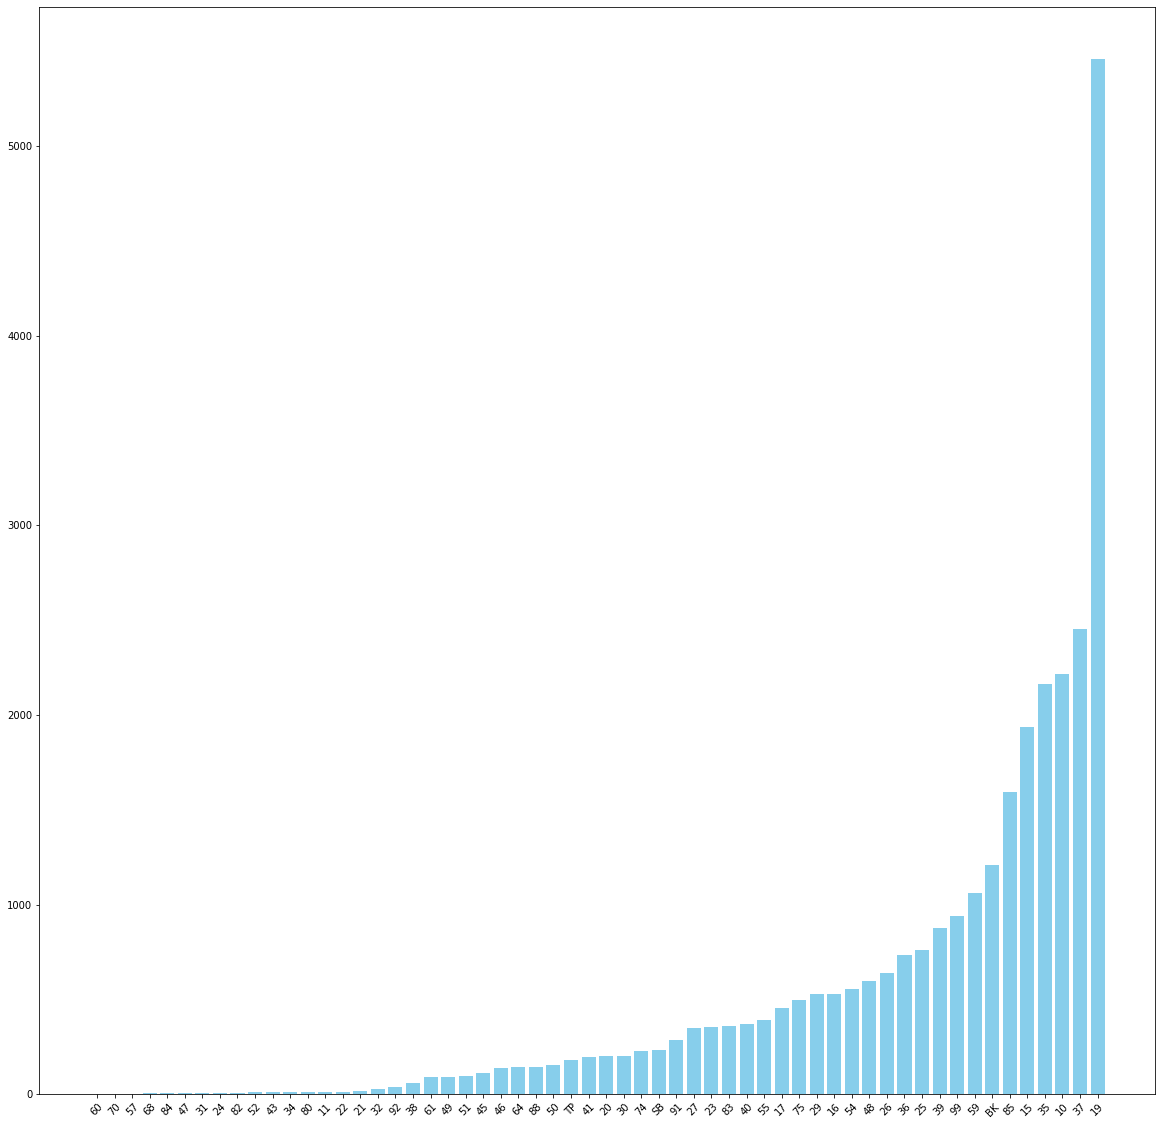

In [50]:
import jupyter
import pymysql
import collections

conn = pymysql.connect(host='eos-coupon-dev-instance-1.cm3cmztxk6py.ap-northeast-2.rds.amazonaws.com',
                      user = 'ecmonitor',
                       password = 'ecmonitor1234',
                       db = 'ecmonitor',
                       charset = 'utf8')
cursor = conn.cursor()

woman_sql = """select right(bi.item_cd,5) from
    (SELECT bo.goods_id, bo.mem_id, count(1) AS cnt
      FROM base_order bo
               INNER JOIN base_member bm ON bo.mem_id = bm.mem_id
      GROUP BY bo.goods_id) ord
LEFT JOIN base_item bi on ord.goods_id = bi.goods_id
where mid(bi.item_cd,3,1) = 'W';"""
# 여성용 신발 코드

man_sql = """select right(bi.item_cd,5) from
    (SELECT bo.goods_id, bo.mem_id, count(1) AS cnt
      FROM base_order bo
               INNER JOIN base_member bm ON bo.mem_id = bm.mem_id
      GROUP BY bo.goods_id) ord
LEFT JOIN base_item bi on ord.goods_id = bi.goods_id
where mid(bi.item_cd,3,1) = 'M';"""

cursor.execute(woman_sql)
woman_style = [item[0] for item in cursor.fetchall()]
cursor.execute(man_sql)
man_style = [item[0] for item in cursor.fetchall()]

woman_color = collections.defaultdict(int)
woman_size = collections.defaultdict(int)
man_color = collections.defaultdict(int)
man_size = collections.defaultdict(int)

for e in woman_style:
    woman_color[e[0:2]] += 1
    woman_size[e[2:]] += 1

for v in man_style:
    man_color[v[0:2]] += 1
    man_size[v[2:]] += 1

def sort_asc(x: list):
    return x[1]

sorted_wsize = sorted(woman_size.items(), key=sort_asc)
sorted_msize = sorted(man_size.items(), key=sort_asc)

sorted_wcolor = sorted(woman_color.items(), key=sort_asc)
sorted_mcolor = sorted(man_color.items(), key=sort_asc)

from matplotlib import pyplot as plt

y = list()
x = list()
for value in sorted_wcolor:
    y.append(value[1])
    x.append(value[0])
plt.rcParams["figure.figsize"] = (20,20)
plt.xticks(rotation=45)
plt.bar(x,y, width = 0.8, color = "skyblue")
plt.show()
